In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

plt.rcParams['text.usetex'] = True

## $g_{tt}$ 

In [2]:
def gtt_card(r, c, sigma):
    return (np.exp(-((np.sqrt(c) * (np.pi - 2 * np.arctan((1 - c + r) / (np.sqrt(c) * np.sqrt(2 - c + 2 * sigma)))) / np.sqrt(2 - c + 2 * sigma)))) * (r - sigma)) / r
def gttcard_prime(r, c, sigma):
    return (np.exp(-((np.sqrt(c) * (np.pi - 2 * np.arctan((1 - c + r) / (np.sqrt(c) * np.sqrt(2 - c + 2 * sigma)))) / np.sqrt(2 - c + 2 * sigma)))) * (2*c * (r - sigma)**2 + (1 + r)**2 * sigma)) / (r**2 * (1 - 2 * (-1 + c) * r + r**2 + 2 * c * sigma))


## Light Ring

Define relevant quantities.

In [3]:
def lr_eqncard(r):
    return 2*gtt_card(r,c,sigma)-r*gttcard_prime(r,c,sigma)

The light ring must be given by

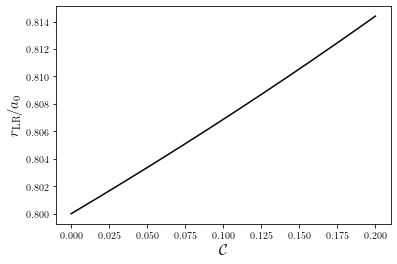

In [4]:
c_vals = np.linspace(10**-20, 0.2, 10**3)

lr_vals_card = []

for c_val in c_vals:
    c = c_val
    sigma = 8/15
    lr_vals_card.append(*fsolve(lr_eqncard, 0.3))

plt.plot(c_vals, lr_vals_card, c = 'black')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$r_{\mathrm{LR}}/a_0$', fontsize = 15)
plt.show()

Increasing the compactness decreases the size of the black hole. We can interpret this as the light ring following the black hole horizon until the increasing mass within it dominates and makes it expand.

# Angular frequency at $r_{\mathrm{LR}}$

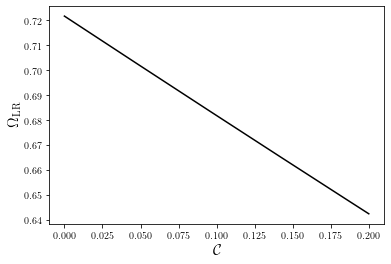

In [5]:
om_card = []

for i in range(len(lr_vals_card)):
    c = c_vals[i]
    sigma = 8/15
    om_card.append(np.sqrt(gtt_card(lr_vals_card[i],c,sigma))/lr_vals_card[i])

plt.plot(c_vals, om_card, c = 'black')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$\Omega_{\mathrm{LR}}$', fontsize = 15)
plt.show()

Even if the light ring radius go down, the matter content increases the circumference of the light ring.

# Impact Parameter

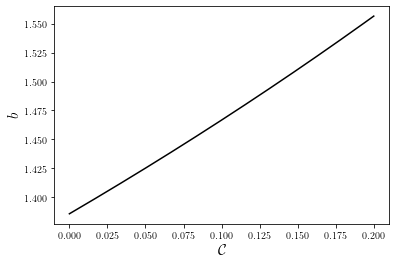

In [6]:
imp_card = []

for i in range(len(lr_vals_card)):
    imp_card.append(1/om_card[i])

plt.plot(c_vals, imp_card, c = 'black')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$b$', fontsize = 15)
plt.show()